In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats

# anova model from formula
from statsmodels.formula.api import ols
# anova table from ols model
from statsmodels.stats.anova import anova_lm
# for qqplot
import statsmodels.api as sm
# tukey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# correlation
from scipy.stats import pearsonr, spearmanr, kendalltau

<b>Контекст:</b>
Вы работаете в рекрутинговом агентстве по подбору персонала на позиции Data Science.

Данные представляют собой набор вакансий за 3 года, которые поступили в агентство. На их основе ответьте на следующие вопросы:

1. Что оказывает наиболее сильное влияние на зарплатную вилку в вакансии?
2. Как распределены позиции (грейды) сотрудников в компаниях разного размера и какие выводы можно сделать на основе полученного распределения?
3. В какую компанию выгоднее устраиваться сотруднику, грейд которого миддл или сеньор?

In [ ]:
data = pd.read_csv('ds_salaries.csv', index_col=0)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,US,L


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [ ]:
# количественные дискретные
data.work_year.unique()

array([2020, 2021, 2022])

In [ ]:
# качественные
data.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
# качественные
data.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [ ]:
# качественные порядковые
data.company_size.unique(), data.experience_level.unique()

array(['L', 'S', 'M'], dtype=object)

<b>1. Что оказывает наиболее сильное влияние на зарплатную вилку в вакансии?</b>

In [ ]:
spearmanr(data.salary_in_usd, data.experience_level)

SignificanceResult(statistic=0.5585674779878691, pvalue=4.29733449902836e-51)

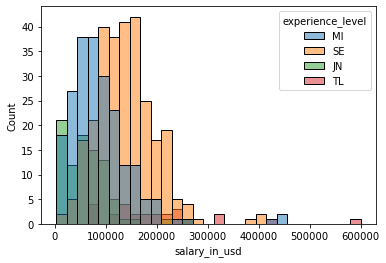

In [ ]:
sns.histplot(data=data, x='salary_in_usd', hue='experience_level');

In [ ]:
spearmanr(data.salary_in_usd, data.company_size)

SignificanceResult(statistic=-0.11766706340096365, pvalue=0.003694621368311135)

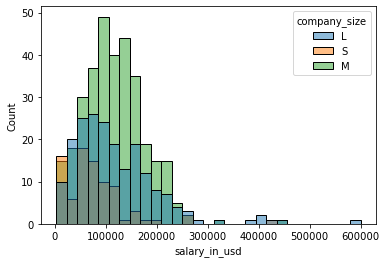

In [ ]:
# распределение зарплат по размеру компании
sns.histplot(data=data, x='salary_in_usd', hue='company_size');

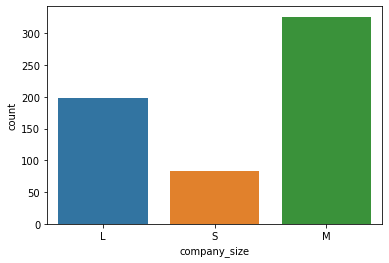

In [ ]:
# количество открытых вакансий в компании в зависимости от их размера
sns.countplot(data=data, x='company_size');

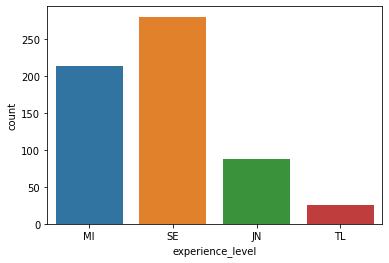

In [ ]:
# количество вакансий в компании в зависимости от грейда кандидата
sns.countplot(data=data, x='experience_level');

<b>2. Как распределены позиции (грейды) сотрудников в компаниях разного размера и какие выводы можно сделать на основе полученного распределения?</b>

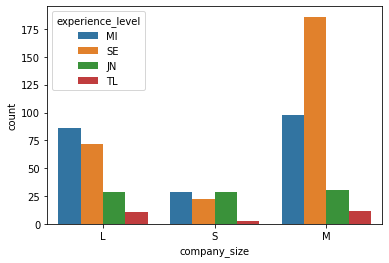

In [ ]:
sns.countplot(data=data, x='company_size', hue='experience_level');

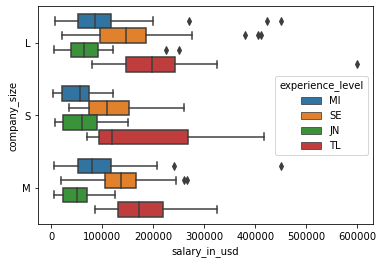

In [ ]:
sns.boxplot(data=data, x='salary_in_usd', y='company_size', hue='experience_level');

<b>3. В какую компанию выгоднее устраиваться сотруднику, грейд которого миддл или сеньор?</b>

In [ ]:
middle = data[data.experience_level == 'MI']

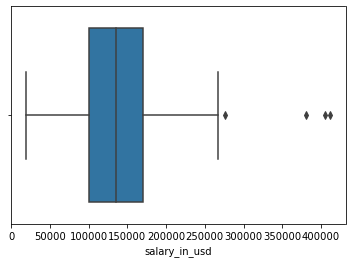

In [ ]:
sns.boxplot(data=middle, x='salary_in_usd');

In [ ]:
#основные статистики
middle.salary_in_usd.describe()

count       280.000000
mean     138617.292857
std       57691.978337
min       18907.000000
25%      100000.000000
50%      135500.000000
75%      170000.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

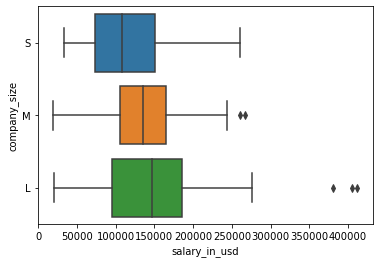

In [ ]:
sns.boxplot(data=middle, x='salary_in_usd', y='company_size');

In [ ]:
two_way = ols('salary_in_usd ~ company_size', middle).fit()
anova_lm(two_way)

,df,sum_sq,mean_sq,F,PR(>F)
company_size,2.0,1.714488e+10,8.572439e+09,2.605208,0.075698
Residual,277.0,9.114688e+11,3.290501e+09,NaN,NaN


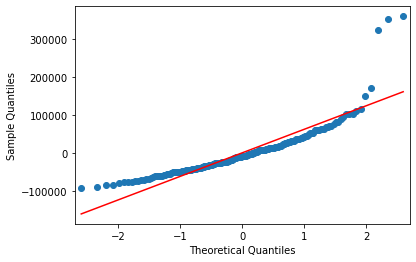

In [ ]:
# проверка остатков на нормальность
sm.qqplot(two_way.resid, line='s');

In [ ]:
stats.shapiro(two_way.resid)

ShapiroResult(statistic=0.8005944490432739, pvalue=8.754643492827198e-16)

In [ ]:
groups = []
for i, gr in data.groupby(['company_size']):
    groups.append(gr.salary_in_usd)

In [ ]:
# тест Левена на равенство дисперсий
stats.levene(*groups)

LeveneResult(statistic=6.50853451444031, pvalue=0.0015973775552195865)

In [ ]:
print(pairwise_tukeyhsd(endog=data.salary_in_usd, alpha=0.05, groups=data['company_size']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     L      M  -2337.5287 0.9265 -17094.0049  12418.9475  False
     L      S -41610.3203    0.0 -63026.3979 -20194.2426   True
     M      S -39272.7916    0.0 -59408.7461  -19136.837   True
---------------------------------------------------------------


In [ ]:
senior = data[data.experience_level == 'SE']

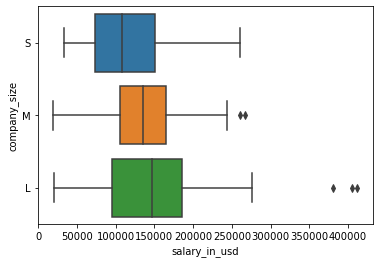

In [ ]:
sns.boxplot(data=senior, x='salary_in_usd', y='company_size');

In [ ]:
two_way = ols('salary_in_usd ~ company_size', senior).fit()
anova_lm(two_way)

,df,sum_sq,mean_sq,F,PR(>F)
company_size,2.0,1.714488e+10,8.572439e+09,2.605208,0.075698
Residual,277.0,9.114688e+11,3.290501e+09,NaN,NaN
